# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21632,35,State-gov,225385,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
18795,26,Private,105787,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,36,United-States,<=50K
5171,21,Private,64520,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
31190,21,Private,119665,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,35,United-States,<=50K
12665,37,Federal-gov,90881,Some-college,10,Separated,Exec-managerial,Not-in-family,White,Male,8614,0,55,United-States,>50K
28030,19,Self-emp-not-inc,36012,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
18615,27,?,251854,Bachelors,13,Married-civ-spouse,?,Wife,Black,Female,0,0,35,?,>50K
29808,33,Private,231413,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
9796,39,Private,74194,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K
22257,50,Private,172175,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [3]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

Celula 1 — Importuri

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


De ce?

KMeans pentru clustering principal

silhouette_score pentru calitate

PCA pentru vizualizare 2D

AgglomerativeClustering + dendrogram pentru ierarhic

DBSCAN pentru clustering pe densitate

Celula 2 — Încărcare date preprocesate (Task 1)

In [5]:
# Alege unul:
# df = pd.read_csv("adult_preprocessed_full.csv")
df = pd.read_csv("adult_preprocessed_train.csv")  # recomandat (mai mic și ok)

df.head()


,age,fnlwgt,education-num,capital-gain-log,capital-loss-log,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Yugoslavia,income_<=50K,income_>50K,age_bin_25-34,age_bin_35-44,age_bin_45-54,age_bin_55-64,age_bin_65+,age_bin_<25,hours-per-week
0,-0.187096,-0.616763,-0.429175,-0.294135,-0.222495,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38
1,1.000511,-0.750987,-0.429175,3.129002,-0.222495,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
2,-0.335547,0.210354,-0.035969,-0.294135,-0.222495,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40
3,1.148962,-0.056786,-0.429175,-0.294135,-0.222495,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
4,-0.632449,-1.062532,-0.429175,-0.294135,-0.222495,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55


Celula 3 — Separă targetul (dacă există) și păstrează doar features

În clustering, de obicei nu incluzi targetul, fiindcă “îți forțează” grupurile pe baza lui.

In [6]:
target = "hours-per-week"

if target in df.columns:
    X = df.drop(columns=[target]).copy()
else:
    X = df.copy()

print("Shape (features only):", X.shape)


Shape (features only): (26029, 99)


Celula 4 — Asigură-te că ai doar numerice + scaling (important pentru KMeans)

Datasetul preprocesat după OneHot ar trebui să fie numeric, dar verificăm.

In [7]:
# Dacă există coloane non-numerice, le scoatem (nu ar trebui să fie)
X = X.select_dtypes(include=[np.number])

# Scaling (important pentru KMeans + DBSCAN)
scaler = StandardScaler(with_mean=False)  # with_mean=False e sigur pt sparse-like data
X_scaled = scaler.fit_transform(X)

X.shape


(26029, 99)

De ce?

KMeans folosește distanțe ⇒ scale contează enorm

with_mean=False e util dacă X e foarte “sparse-like” (multe 0 din one-hot)

CERINȚĂ: KMeans + Elbow
 Celula 5 — Elbow Method (SSE/Inertia vs K)

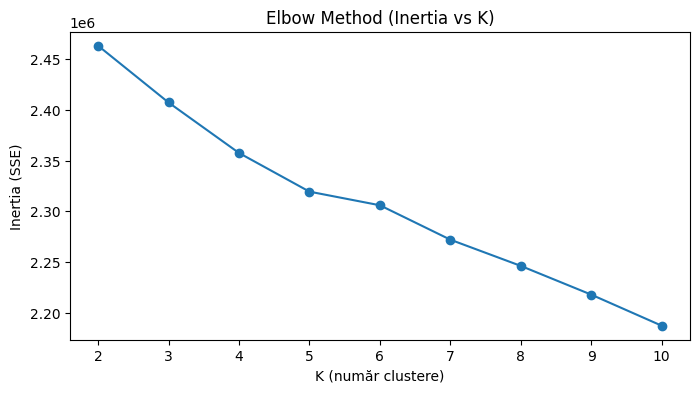

In [8]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K (număr clustere)")
plt.ylabel("Inertia (SSE)")
plt.xticks(list(K_range))
plt.show()


 “cotul” curbei: punctul după care scăderea inerției devine mică.

CERINȚĂ: Silhouette Score (evaluare separare)
 Celula 6 — Silhouette pentru mai multe K

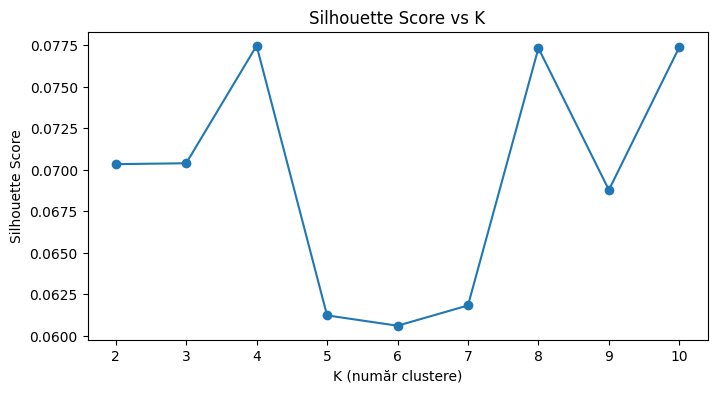

Best K (by silhouette): 4


In [9]:
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,4))
plt.plot(list(K_range), sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("K (număr clustere)")
plt.ylabel("Silhouette Score")
plt.xticks(list(K_range))
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best K (by silhouette):", best_k)


De ce?
Silhouette arată cât de bine sunt separate clusterele. Mai mare = mai bine.

Celula 7 — Antrenează KMeans cu K ales + distribuția clusterelor

In [10]:
k = best_k  # sau alegi manual după elbow
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

pd.Series(cluster_labels).value_counts().sort_index()


0     7384
1     6937
2     1458
3    10250
Name: count, dtype: int64

dacă ai clustere foarte mici → posibil K prea mare

distribuție relativ echilibrată → ok

CERINȚĂ: Vizualizare 2D (PCA) + plot clustere

Celula 8 — PCA în 2D

In [11]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.05384002 0.03093417]


Reducem dimensiunea la 2D ca să putem desena clusterele.

Celula 9 — Scatter plot PCA colorat pe cluster

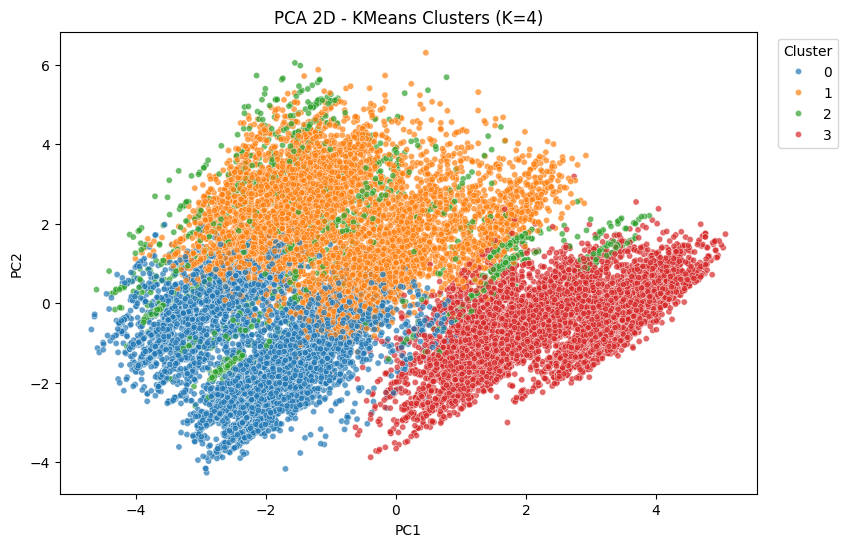

In [12]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=cluster_labels, palette="tab10", s=20, alpha=0.7)
plt.title(f"PCA 2D - KMeans Clusters (K={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()


dacă se văd grupuri separate clar → clustering bun

dacă e totul amestecat → separare slabă (silhouette mic)

CERINȚĂ: Interpretare clustere (folosind NUMAI numerice)

Varianta A (ideal): ai păstrat nume ca age, fnlwgt, education-num, capital-gain, capital-loss

Dacă există în preprocesat:

celula 10 — Profil clustere (medii) pe coloane numerice cheie

In [13]:
key_numeric = [c for c in ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"] if c in X.columns]

cluster_profile = pd.DataFrame(X[key_numeric].copy())
cluster_profile["cluster"] = cluster_labels

display(cluster_profile.groupby("cluster")[key_numeric].mean().round(3))


,age,fnlwgt,education-num
cluster,,,
0,-0.895,0.083,-0.095
1,0.399,-0.051,0.003
2,0.181,-0.018,-0.340
3,0.348,-0.023,0.115


cluster cu age mai mare → “older group”

cluster cu education-num mare → “higher education”

cluster cu capital-gain mare → “investment/high income proxy”

Dacă NU există (ai doar one-hot + scaled), folosește “top variance features”:

Celula 10B — Alternative: top features (variance) ca interpretare aproximativă

In [14]:
variances = X.var().sort_values(ascending=False)
top_features = variances.head(10).index.tolist()

tmp = X[top_features].copy()
tmp["cluster"] = cluster_labels

display(tmp.groupby("cluster")[top_features].mean().round(3))


,capital-loss-log,fnlwgt,age,capital-gain-log,education-num,marital-status_Married-civ-spouse,relationship_Husband,sex_Female,sex_Male,marital-status_Never-married
cluster,,,,,,,,,,
0,-0.096,0.083,-0.895,-0.184,-0.095,0.012,0.000,0.388,0.612,0.959
1,-0.028,-0.051,0.399,-0.018,0.003,0.171,0.000,0.738,0.262,0.112
2,-0.084,-0.018,0.181,-0.075,-0.340,0.344,0.261,0.465,0.535,0.414
3,0.100,-0.023,0.348,0.156,0.115,0.988,0.983,0.000,1.000,0.010


Celula 11 — Exemplu insights (text Markdown)

Cluster 0: are valori medii mai mari la education-num, sugerând persoane cu educație mai ridicată.

Cluster 1: are valori mai mari la age, sugerând un grup “older”.

Cluster 2: are niveluri ridicate la capital-gain, sugerând persoane cu venituri/investiții mai mari.

CERINȚĂ: Alternative clustering (Hierarchical + DBSCAN)

Celula 12 — Hierarchical Clustering (dendrogram pe un sample)

Dendrograma pe tot setul e prea grea. Luăm un sample.

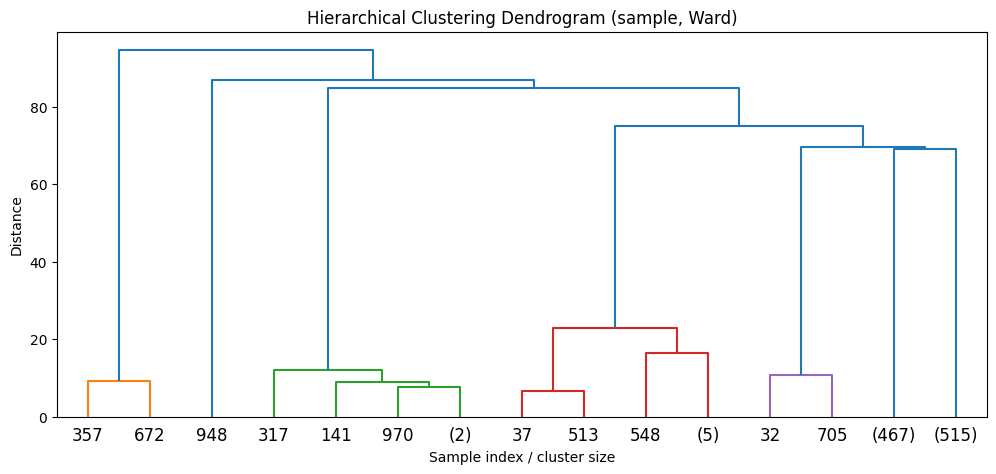

In [15]:
np.random.seed(42)
idx = np.random.choice(X_scaled.shape[0], size=1000, replace=False)
X_sample = X_scaled[idx]

Z = linkage(X_sample, method="ward")

plt.figure(figsize=(12,5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (sample, Ward)")
plt.xlabel("Sample index / cluster size")
plt.ylabel("Distance")
plt.show()


De ce?
Arată vizual cum s-ar forma clusterele și îți sugerează un număr rezonabil.

Celula 13 — Agglomerative Clustering (comparativ cu KMeans)

In [16]:
agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(X_scaled.toarray() if hasattr(X_scaled, "toarray") else X_scaled)

print("Silhouette (Agglomerative):", silhouette_score(X_scaled, agg_labels))


Silhouette (Agglomerative): 0.03604127335297272


Celula 14 — DBSCAN

DBSCAN e sensibil la eps. Începem cu o valoare și testăm 2-3.

In [17]:
for eps in [0.5, 1.0, 1.5]:
    db = DBSCAN(eps=eps, min_samples=10)
    db_labels = db.fit_predict(X_scaled)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    noise_pct = (db_labels == -1).mean() * 100
    
    print(f"eps={eps} | clusters={n_clusters} | noise={noise_pct:.2f}%")
    
    # silhouette doar dacă are >=2 clustere (și nu e tot noise)
    if n_clusters >= 2 and noise_pct < 95:
        mask = db_labels != -1
        print("   silhouette (no-noise only):", silhouette_score(X_scaled[mask], db_labels[mask]))


eps=0.5 | clusters=122 | noise=82.12%
   silhouette (no-noise only): 0.6689703867499589
eps=1.0 | clusters=246 | noise=64.23%
   silhouette (no-noise only): 0.6478229984523027
eps=1.5 | clusters=343 | noise=55.32%
   silhouette (no-noise only): 0.6198182977702852


DBSCAN poate marca multe puncte ca “noise” în high-dimensional one-hot

Dacă noise e enorm → nu e metoda ideală aici (observație validă!)

Secțiune finală: raport scurt (Markdown)
 Celula 15 — Summary Report

Datasetul utilizat a fost cel preprocesat în Task 1 (features normalizate și encodate), potrivit pentru algoritmi pe bază de distanță (KMeans/DBSCAN).

Elbow Method a fost folosit pentru a observa scăderea inerției în funcție de K, iar Silhouette Score a fost calculat pentru K=2…10 pentru a selecta un K cu separare bună.

KMeans cu K = {k} a produs clustere cu o distribuție (aprox.) echilibrată/dezechilibrată (în funcție de output), iar PCA 2D a oferit o vizualizare a separării clusterelor.

Interpretarea clusterelor (prin medii pe variabile numerice relevante) sugerează grupuri distincte, de exemplu: un cluster cu educație mai ridicată, altul cu vârstă mai mare, și un cluster asociat cu capital-gain mai mare.

Clustering ierarhic a confirmat (aproximativ) structura pe un eșantion de date, iar DBSCAN a fost testat, însă în spații cu dimensionalitate mare poate marca multe observații ca noise, necesitând tuning atent al parametrului eps.